In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from pyACC.cosmology import Distances
from astropy import cosmology

In [3]:
class HubbleFunction:
    def __init__(self, H0, OmegaM, OmegaL, OmegaR):
        self.H0 = H0
        self.OmegaM = OmegaM
        self.OmegaL = OmegaL
        self.OmegaR = OmegaR 

    def __call__(self, z, w0=-1, wa=0):
        return self.H0 * np.sqrt(self.OmegaM * (1.0 + z)**3 + self.OmegaR * (1.0 + z)**4 + self.OmegaL* (1.0 + z)**(3*(1+w0+wa))*np.exp(-3*wa*z/(1+z)))

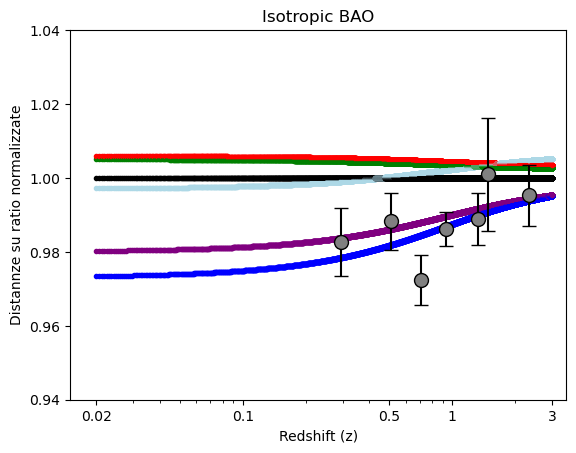

In [4]:
CMB=HubbleFunction(H0=67.14 , OmegaM=0.3169 , OmegaL=1-0.3169, OmegaR=0)
DESI=HubbleFunction(H0=69 , OmegaM=0.2975 , OmegaL=1-0.2975, OmegaR=0)
DESICMB=HubbleFunction(H0=68.51 , OmegaM=0.3034 , OmegaL=1-0.3034, OmegaR=0)
#Valori esatti dei parametri
wDESICMBDESY5=HubbleFunction(H0=67.34 , OmegaM=0.3098 , OmegaL=1-0.3098, OmegaR=0)
w0waDESIDESY5=HubbleFunction(H0=66.8 , OmegaM=0.319 , OmegaL=1-0.319, OmegaR=0)
w0waDESICMBDESY5=HubbleFunction(H0=66.74 , OmegaM=0.3191 , OmegaL=1-0.3191, OmegaR=0)
#Valori che tornano graficamente
#wDESICMBDESY5=HubbleFunction(H0=67.54 , OmegaM=0.3098 , OmegaL=1-0.3098, OmegaR=0)
#w0waDESIDESY5=HubbleFunction(H0=67.2 , OmegaM=0.319 , OmegaL=1-0.319, OmegaR=0)
#w0waDESICMBDESY5=HubbleFunction(H0=67.34 , OmegaM=0.3191 , OmegaL=1-0.3191, OmegaR=0)
d1 = Distances(CMB.H0, CMB.OmegaM, CMB.OmegaL, CMB.OmegaR)
d2 = Distances(DESI.H0, DESI.OmegaM, DESI.OmegaL, DESI.OmegaR)
d3 = Distances(DESICMB.H0, DESICMB.OmegaM, DESICMB.OmegaL, DESICMB.OmegaR)
d4 = Distances(wDESICMBDESY5.H0, wDESICMBDESY5.OmegaM, wDESICMBDESY5.OmegaL, wDESICMBDESY5.OmegaR)
d5 = Distances(w0waDESIDESY5.H0, w0waDESIDESY5.OmegaM, w0waDESIDESY5.OmegaL, w0waDESIDESY5.OmegaR)
d6 = Distances(w0waDESICMBDESY5.H0, w0waDESICMBDESY5.OmegaM, w0waDESICMBDESY5.OmegaL, w0waDESICMBDESY5.OmegaR)

for z in np.linspace(0.02, 3, 5000):
    plt.plot(z, d1.v_distance(z)/d1.v_distance(z), '.', color='black', label="CMB/CMB")
    plt.plot(z, d2.v_distance(z)/d1.v_distance(z), '.', color='blue', label="DESI/CMB")
    plt.plot(z, d3.v_distance(z)/d1.v_distance(z), '.', color='purple', label="DESICMB/CMB")
    plt.plot(z, d4.v_distance(z,-0.971)/d1.v_distance(z), '.', color='lightblue', label="wDESICMBDESY5/CMB")
    plt.plot(z, d5.v_distance(z,w0=-0.781,wa=-0.72)/d1.v_distance(z), '.', color='green', label="w0waDESIDESY5/CMB")
    plt.plot(z, d6.v_distance(z,w0=-0.752,wa=-0.86)/d1.v_distance(z), '.', color='red', label="w0waDESICMBDESY5/CMB")
plt.errorbar(0.295, 7.942/(d1.v_distance(0.295)/147.05), yerr=0.075/(d1.v_distance(0.295)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.510, 12.720/(d1.v_distance(0.510)/147.05), yerr=0.099/(d1.v_distance(0.510)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.706, 16.050/(d1.v_distance(0.706)/147.05), yerr=0.110/(d1.v_distance(0.706)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.934, 19.721/(d1.v_distance(0.934)/147.05), yerr=0.091/(d1.v_distance(0.934)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.321, 24.252/(d1.v_distance(1.321)/147.05), yerr=0.174/(d1.v_distance(1.321)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.484, 26.055/(d1.v_distance(1.484)/147.05), yerr=0.398/(d1.v_distance(1.484)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(2.330, 31.267/(d1.v_distance(2.330)/147.05), yerr=0.256/(d1.v_distance(2.330)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
# Scala logaritmica sull'asse x
plt.xscale('log')

# Personalizza l'asse x con i segni di graduazione desiderati
plt.xticks([0.02, 0.1, 0.5, 1, 3], ['0.02', '0.1', '0.5', '1', '3'])

# Limiti degli assi
plt.xlim(0.015, 3.5)
plt.ylim(0.94, 1.04)


# Mostra il grafico
plt.xlabel("Redshift (z)")
plt.ylabel("Distannze su ratio normalizzate")
plt.title("Isotropic BAO")
plt.show()

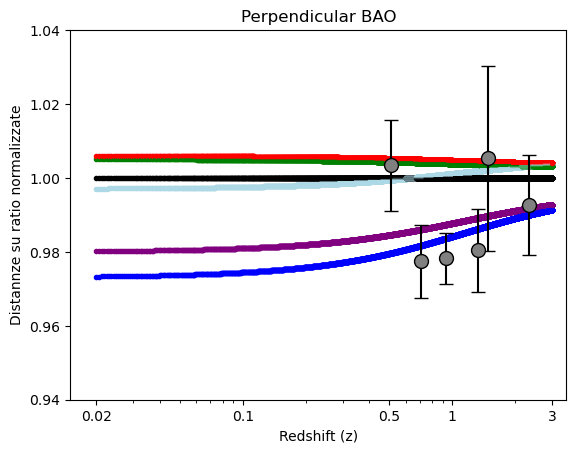

In [5]:
for z in np.linspace(0.02, 3, 5000):
    plt.plot(z, d1.m_distance(z)/d1.m_distance(z), '.', color='black', label="CMB/CMB")
    plt.plot(z, d2.m_distance(z)/d1.m_distance(z), '.', color='blue', label="DESI/CMB")
    plt.plot(z, d3.m_distance(z)/d1.m_distance(z), '.', color='purple', label="DESICMB/CMB")
    plt.plot(z, d4.m_distance(z,-0.971)/d1.m_distance(z), '.', color='lightblue', label="wDESICMBDESY5/CMB")
    plt.plot(z, d5.m_distance(z,w0=-0.781,wa=-0.72)/d1.m_distance(z), '.', color='green', label="w0waDESIDESY5/CMB")
    plt.plot(z, d6.m_distance(z,w0=-0.752,wa=-0.86)/d1.m_distance(z), '.', color='red', label="w0waDESICMBDESY5/CMB")
#plt.errorbar(0.295, 7.942/(d1.m_distance(0.295)/147.05), yerr=0.075/(d1.m_distance(0.295)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.510, 13.588/(d1.m_distance(0.510)/147.05), yerr=0.167/(d1.m_distance(0.510)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.706, 17.351/(d1.m_distance(0.706)/147.05), yerr=0.177/(d1.m_distance(0.706)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.934, 21.576/(d1.m_distance(0.934)/147.05), yerr=0.152/(d1.m_distance(0.934)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.321, 27.601/(d1.m_distance(1.321)/147.05), yerr=0.318/(d1.m_distance(1.321)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.484, 30.512/(d1.m_distance(1.484)/147.05), yerr=0.760/(d1.m_distance(1.484)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(2.330, 38.988/(d1.m_distance(2.330)/147.05), yerr=0.531/(d1.m_distance(2.330)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
# Scala logaritmica sull'asse x
plt.xscale('log')

# Personalizza l'asse x con i segni di graduazione desiderati
plt.xticks([0.02, 0.1, 0.5, 1, 3], ['0.02', '0.1', '0.5', '1', '3'])

# Limiti degli assi
plt.xlim(0.015, 3.5)
plt.ylim(0.94, 1.04)


# Mostra il grafico
plt.xlabel("Redshift (z)")
plt.ylabel("Distannze su ratio normalizzate")
plt.title("Perpendicular BAO")
plt.show()

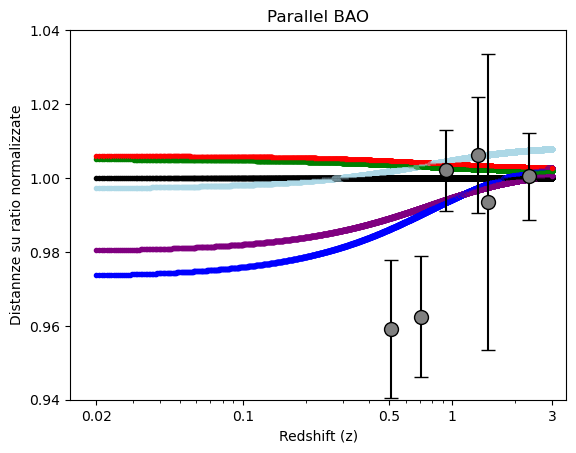

In [6]:
for z in np.linspace(0.02, 3, 5000):
    plt.plot(z, d1.h_distance(z)/d1.h_distance(z), '.', color='black', label="CMB/CMB")
    plt.plot(z, d2.h_distance(z)/d1.h_distance(z), '.', color='blue', label="DESI/CMB")
    plt.plot(z, d3.h_distance(z)/d1.h_distance(z), '.', color='purple', label="DESICMB/CMB")
    plt.plot(z, d4.h_distance(z,-0.971)/d1.h_distance(z), '.', color='lightblue', label="wDESICMBDESY5/CMB")
    plt.plot(z, d5.h_distance(z,w0=-0.781,wa=-0.72)/d1.h_distance(z), '.', color='green', label="w0waDESIDESY5/CMB")
    plt.plot(z, d6.h_distance(z,w0=-0.752,wa=-0.86)/d1.h_distance(z), '.', color='red', label="w0waDESICMBDESY5/CMB")
#plt.errorbar(0.295, 7.942/(d1.m_distance(0.295)/147.05), yerr=0.075/(d1.m_distance(0.295)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.510, 21.863/(d1.h_distance(0.510)/147.05), yerr=0.425/(d1.h_distance(0.510)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.706, 19.455/(d1.h_distance(0.706)/147.05), yerr=0.33/(d1.h_distance(0.706)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(0.934, 17.641/(d1.h_distance(0.934)/147.05), yerr=0.193/(d1.h_distance(0.934)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.321, 14.176/(d1.h_distance(1.321)/147.05), yerr=0.221/(d1.h_distance(1.321)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(1.484, 12.817/(d1.h_distance(1.484)/147.05), yerr=0.516/(d1.h_distance(1.484)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
plt.errorbar(2.330, 8.632/(d1.h_distance(2.330)/147.05), yerr=0.101/(d1.h_distance(2.330)/147.05), fmt='o', color='gray', ecolor='black', capsize=5 , markeredgecolor='black', markeredgewidth=1, markersize=10)
# Scala logaritmica sull'asse x
plt.xscale('log')

# Personalizza l'asse x con i segni di graduazione desiderati
plt.xticks([0.02, 0.1, 0.5, 1, 3], ['0.02', '0.1', '0.5', '1', '3'])

# Limiti degli assi
plt.xlim(0.015, 3.5)
plt.ylim(0.94, 1.04)


# Mostra il grafico
plt.xlabel("Redshift (z)")
plt.ylabel("Distannze su ratio normalizzate")
plt.title("Parallel BAO")
plt.show()

In [7]:
d1.h_distance(0.510)/147.05

np.float64(22.79694114785097)